# Directed scale-free networks

## Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

from netin import DPA
from netin import DH
from netin import DPAH
from netin import viz
from netin import stats

## Network parameters

In [2]:
n = 1000
f_m = 0.1
d = 0.005
h_MM = 0.9
h_mm = 0.9
plo_M = 2.0
plo_m = 2.0
seed = 1234

## Generation

In [3]:
# DPA: Preferential attachment only
g_dpa = DPA(n=n, f_m=f_m, d=d, plo_M=plo_M, plo_m=plo_m, seed=seed)
g_dpa.generate()
g_dpa.info()

=== Params ===
n: 1000
f_m: 0.1
d: 0.005 (expected edges: 4995)
plo_M: 2.0
plo_m: 2.0
seed: 1234
=== Model ===
Model: DPA
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 9.848317384719849 (secs)
=== Computed ===
- is directed: True
- number of nodes: 1000
- number of edges: 4995
- minimum degree: 1
- fraction of minority: 0.1
- edge-type counts: Counter({'MM': 3833, 'mM': 583, 'Mm': 516, 'mm': 63})
- density: 0.005
- diameter: <Found infinite path length because the digraph is not strongly connected>
- average shortest path length: <Graph is not strongly connected.>
- average degree: 9.99
- degree assortativity: -0.27521299396388993
- attribute assortativity (m): -0.022100589352773575
- transitivity: 0.005699899015487762
- average clustering: 0.23362545011973282
Calculating best minimal value for power law fit
- M: alpha=2.3015758709603924, sigma=0.0706918976190776, min=3.0, max=None
Calculating best minimal value for power law fit
- m: alpha=1.9317372

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


In [4]:
# DH: Homophily only
g_dh = DH(n=n, f_m=f_m, d=d, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
g_dh.generate()
g_dh.info()

=== Params ===
n: 1000
f_m: 0.1
d: 0.005 (expected edges: 4995)
plo_M: 2.0
plo_m: 2.0
h_MM: 0.9
h_mm: 0.9
mixing matrix: 
[[0.9 0.1]
 [0.1 0.9]]
seed: 1234
=== Model ===
Model: DH
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 9.7410569190979 (secs)
=== Computed ===
- is directed: True
- number of nodes: 1000
- number of edges: 4995
- minimum degree: 1
- fraction of minority: 0.1
- edge-type counts: Counter({'MM': 4205, 'mM': 361, 'mm': 297, 'Mm': 132})
- density: 0.005
- diameter: <Found infinite path length because the digraph is not strongly connected>
- average shortest path length: <Graph is not strongly connected.>
- average degree: 9.99
- degree assortativity: -0.21168560782504153
- attribute assortativity (m): 0.4938264144241701
- transitivity: 0.004226372004289036
- average clustering: 0.18466031814254522
- Empirical homophily within majority: 0.779714444650474
- Empirical homophily within minority: 0.881015161502966


In [5]:
# DPAH: Preferential attachment and homophily
g_dpah = DPAH(n=n, f_m=f_m, d=d, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
g_dpah.generate()
g_dpah.info()

=== Params ===
n: 1000
f_m: 0.1
d: 0.005 (expected edges: 4995)
plo_M: 2.0
plo_m: 2.0
h_MM: 0.9
h_mm: 0.9
mixing matrix: 
[[0.9 0.1]
 [0.1 0.9]]
seed: 1234
=== Model ===
Model: DPAH
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 11.080187559127808 (secs)
=== Computed ===
- is directed: True
- number of nodes: 1000
- number of edges: 4995
- minimum degree: 1
- fraction of minority: 0.1
- edge-type counts: Counter({'MM': 4236, 'mM': 593, 'Mm': 100, 'mm': 66})
- density: 0.005
- diameter: <Found infinite path length because the digraph is not strongly connected>
- average shortest path length: <Graph is not strongly connected.>
- average degree: 9.99
- degree assortativity: -0.2675016460219016
- attribute assortativity (m): 0.11290163443306196
- transitivity: 0.006143370261456685
- average clustering: 0.2519699964272262
- Empirical homophily within majority: None
- Empirical homophily within minority: None


## Plots

### Graph

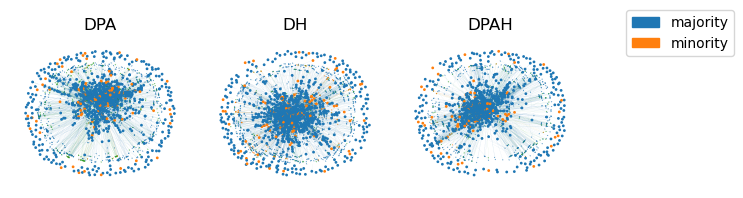

In [6]:
graphs = [g_dpa, g_dh, g_dpah]
viz.plot_graphs(graphs, cell_size=2, share_pos=False)

### Node attributes

In [7]:
md_dpa = g_dpa.get_node_metadata_as_dataframe(n_jobs=10)
md_dh = g_dh.get_node_metadata_as_dataframe(n_jobs=10)
md_dpah = g_dpah.get_node_metadata_as_dataframe(n_jobs=10)


QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
# see example of genereate metadata 
md_dpa.head()

,node,class_label,degree,in_degree,out_degree,clustering,betweenness,closeness,eigenvector,pagerank,degree_rank,in_degree_rank,out_degree_rank,clustering_rank,betweenness_rank,closeness_rank,eigenvector_rank,pagerank_rank
0,0,M,NaN,2,2,0.250000,0.001213,0.180817,7.740078e-02,0.002045,NaN,0.5140,0.4700,0.4135,0.1680,0.0260,0.0235,0.0760
1,1,M,NaN,2,0,0.500000,0.000000,0.002002,4.053211e-18,0.000276,NaN,0.5140,0.9055,0.0660,0.7355,0.5655,0.6050,0.5970
2,2,M,NaN,2,1,0.333333,0.000264,0.002252,8.784978e-18,0.000299,NaN,0.5140,0.6875,0.2360,0.2840,0.5090,0.4310,0.4730
3,3,M,NaN,1,4,0.200000,0.000000,0.001001,7.293040e-18,0.000275,NaN,0.8025,0.2090,0.5560,0.7355,0.8025,0.4570,0.8025
4,4,M,NaN,1,3,0.250000,0.000000,0.001001,9.467909e-19,0.000275,NaN,0.8025,0.3115,0.4135,0.7355,0.8025,0.7540,0.8025


In [9]:
# all into a list
distributions = [md_dpa, md_dh, md_dpah]

#### In-degree

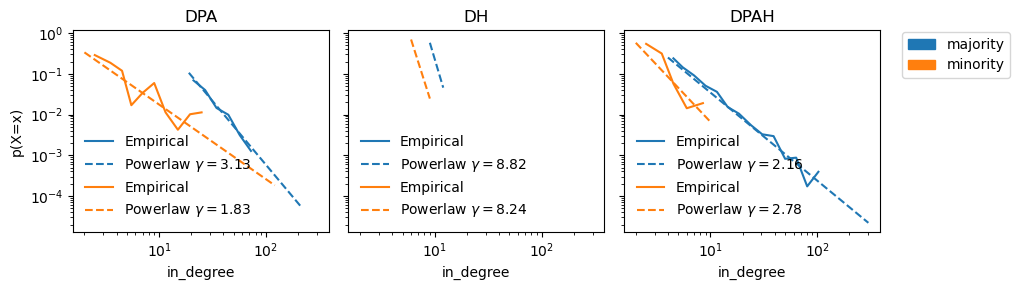

In [10]:
viz.plot_powerlaw_fit(distributions, x='in_degree', hue='class_label',
                      kind='pdf',
                      cell_size=3, sharex=True, sharey=True)

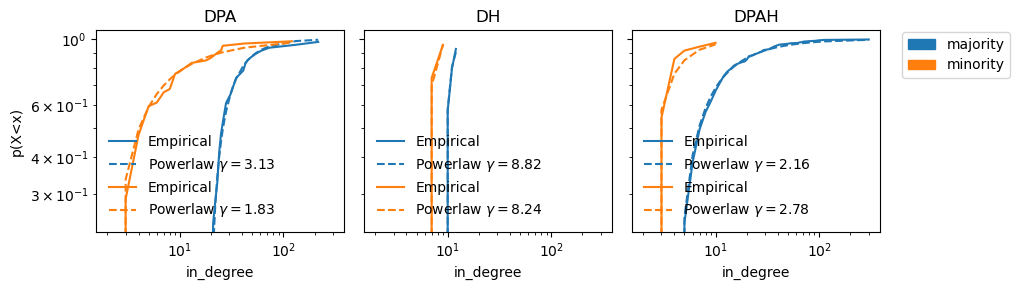

In [11]:
viz.plot_powerlaw_fit(distributions, x='in_degree', hue='class_label',
                      kind='cdf',
                      cell_size=3, sharex=True, sharey=True)

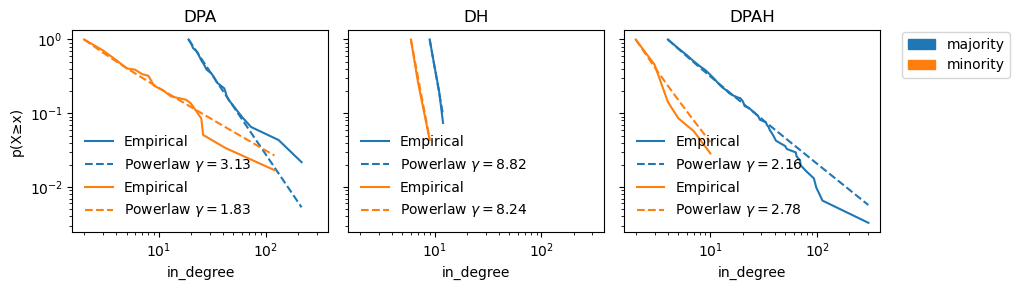

In [12]:
viz.plot_powerlaw_fit(distributions, x='in_degree', hue='class_label',
                      kind='ccdf',
                      cell_size=3, sharex=True, sharey=True)

#### Out-degree

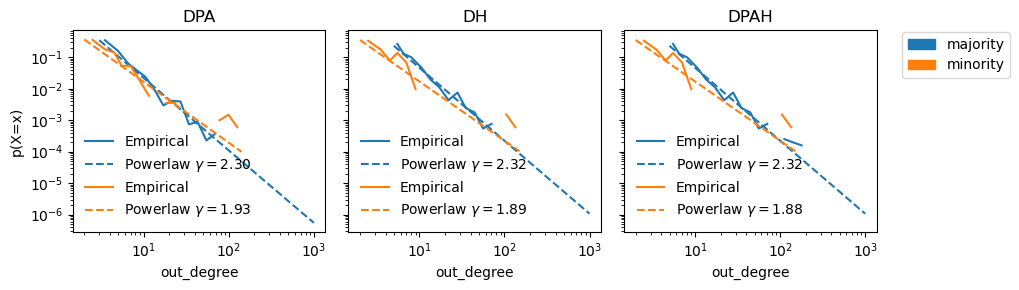

In [13]:
viz.plot_powerlaw_fit(distributions, x='out_degree', hue='class_label',
                      kind='pdf',
                      cell_size=3, sharex=True, sharey=True)

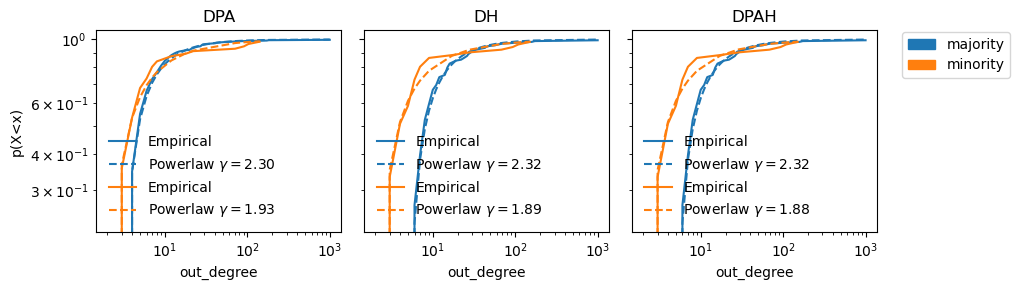

In [14]:
viz.plot_powerlaw_fit(distributions, x='out_degree', hue='class_label',
                      kind='cdf',
                      cell_size=3, sharex=True, sharey=True)

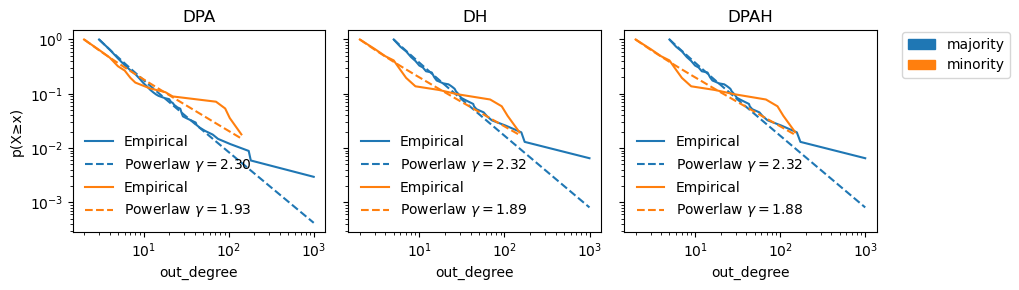

In [15]:
viz.plot_powerlaw_fit(distributions, x='out_degree', hue='class_label',
                      kind='ccdf',
                      cell_size=3, sharex=True, sharey=True)

#### Clustering

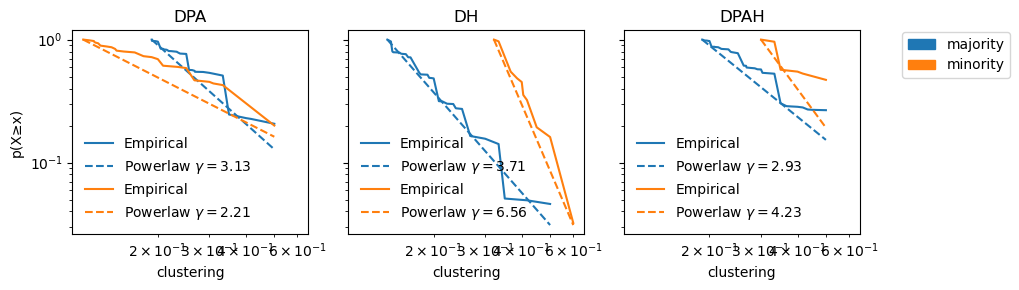

In [16]:
viz.plot_powerlaw_fit(distributions, x='clustering', hue='class_label',
                      kind='ccdf',
                      cell_size=3, sharex=True, sharey=True)

#### PageRank

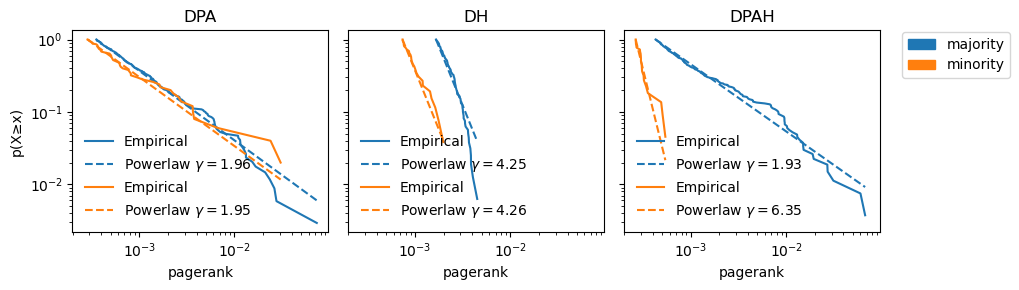

In [17]:
viz.plot_powerlaw_fit(distributions, x='pagerank', hue='class_label',
                      kind='ccdf', verbose=False, bbox=(1.0, 0.9),
                      cell_size=3, sharex=True, sharey=True)